In [1]:
import pandas as pd
import numpy as np

In [2]:
#Mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import Necessary libraries
import os 

# Set Directory path for Dataset
os.chdir("/content/drive/My Drive/")

In [4]:
import pandas as pd
import numpy as np
data_n = pd.read_csv('Final Dataset NEWSPAPERBD.csv')

In [5]:
df_Text = pd.read_csv('Text3.csv')

In [6]:
new = data_n["Publish Date"].str.split(" ", n = 1, expand = True) 

In [7]:
import pickle
data_clean = pd.read_pickle('df_stemmed_bn.pkl')

In [8]:
data_clean['Date'] = new[0]

In [9]:
data_clean['Date'] = pd.to_datetime(data_clean['Date'], utc=False)

In [10]:
data_clean['Week Number']  = data_clean['Date'].dt.isocalendar().week

In [11]:
data_clean.head()

,Text_en,Text_bn,text_en_clean,text_en_clean_2,text_en_clean_3,text_en_clean_4,Date,Week Number
0,Highest number of Covid-19 deaths in a day. Ni...,একদিনে কোভিড -১৯ এর সর্বোচ্চ সংখ্যা। স্বাস্থ্য...,একদিন কোভিড এর সর্বোচ্চ সংখ্যা স্বাস্থ্য সেবা ...,সর্বোচ্চ সংখ্যা স্বাস্থ্য অধিদপ্তর মহাপরিচালক ...,সর্বোচ্চ সংখ্যা স্বাস্থ্য অধিদপ্তর মহাপরিচালক ...,"[সর্বোচ্চ, স্বাস্থ্য, অধিদপ্তর, মহাপরিচালক, ডি...",2020-05-13,20
1,"Thrown out of job, Tangail’s chamcham makers p...","চাকরি থেকে ছিটকে পড়ে, টাঙ্গাইলের চামচাম নির্ম...",চাকরি থেকে ছিটকে পড়ে টাঙ্গাইল চামচাম নির্মাতা...,টাঙ্গাইল চামচাম নির্মাতা প্রাদুর্ভাব লকডাউন বি...,টাঙ্গাইল চামচাম নির্মাতা প্রাদুর্ভাব লকডাউন বি...,"[টাঙ্গাইল, চামচাম, নির্মাতা, প্রাদুর্ভাব, লকডা...",2020-05-13,20
2,Coping with Covid-19 Shutdown: 200 families re...,কোভিড -19 শাটডাউন মোকাবেলা: 200 পরিবার উদ্যানে...,কোভিড শাটডাউন মোকাবেলা পরিবার উদ্যান সুবিধা অর...,শাটডাউন মোকাবেলা পরিবার উদ্যান সুবিধা মাসব্যাপ...,শাটডাউন মোকাবেলা পরিবার উদ্যান সুবিধা মাসব্যাপ...,"[শাটডাউন, মোকাবেলা, পরিবার, উদ্যান, সুবিধা, মা...",2020-05-13,20
3,"7 family members, 4 police personnel test posi...",বগুড়ার কোভিড -১৯ এর জন্য পরিবারের family সদস্...,বগুড়া কোভিড এর জন্য পরিবার সদস্য জন পুলিশ সদস...,বগুড়া পরিবার পজিটিভ পরীক্ষা করেছেন কমপক্ষ বোগ...,বগুড়া পরিবার পজিটিভ পরীক্ষা করেছেন কমপক্ষ বোগ...,"[বগুড়া, পরিবার, পজিটিভ, পরীক্ষা, কমপক্ষ, বোগু...",2020-05-12,20
4,Coronavirus: Health ministry issues 13 directi...,করোনাভাইরাস: স্বাস্থ্য মন্ত্রনালয় সরকারি কর্ম...,করোনাভাইরাস স্বাস্থ্য মন্ত্রনালয় সরকারি কর্মক...,করোনাভাইরাস স্বাস্থ্য মন্ত্রনালয় সরকারি কর্মক...,করোনাভাইরাস স্বাস্থ্য মন্ত্রনালয় সরকারি কর্মক...,"[করোনাভাইরাস, স্বাস্থ্য, মন্ত্রনালয়, সরকারি, ...",2020-05-12,20


In [12]:
all_per_year = data_clean.groupby('Week Number').agg({'Week Number': 'mean', 'text_en_clean_4': 'sum'})

In [13]:
all_per_year = all_per_year.iloc[:18,:].copy()

In [14]:
all_per_year

,Week Number,text_en_clean_4
Week Number,,
4,4,"[করোনাভাইরাস, কীভাবে, করোনাভাইরাস, আনুষ্ঠানিকভ..."
5,5,"[বাংলাদেশী, ফিরেছেন, হাসপাতাল, প্রেরণ, করোনভাই..."
6,6,"[করোনাভাইরাস, প্রাদুর্ভাব, করোনাভাইরাস, উপন্যা..."
7,7,"[করোনাভাইরাস, সনাক্তকরণ, সর্বাধিক, পাঠাচ্ছে, ক..."
8,8,"[সমালোচিত, করোনভাইরাস, সংক্রামিত, বাংলাদেশী, প..."
9,9,"[করোনাভাইরাস, প্রবৃদ্ধি, নিয়ন্ত্রণ, সরকারী, র..."
10,10,"[বাংলাদেশিরা, বসবাসকারী, বাংলাদেশী, উদ্ভূত, কর..."
11,11,"[ভ্রমণকারী, প্রবেশ, স্থগিত, বিশ্বব্যাপী, করোনা..."
12,12,"[করোনাভাইরাস, ভ্যাকসিন, পরীক্ষা, মার্কিন, আধিক..."


In [15]:
# general packages used
!pip install pycountry
import pycountry
import re
import os

import nltk
import nltk.stem
from nltk.tokenize import word_tokenize, sent_tokenize, PunktSentenceTokenizer, RegexpTokenizer
from nltk.corpus import stopwords
from string import punctuation

     |████████████████████████████████| 10.1MB 7.5MB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746863 sha256=adf584b89ab6fe254e2bdc3953451d3ad7a3644c570f44f39d873b9ef74706e4
  Stored in directory: /root/.cache/pip/wheels/33/4e/a6/be297e6b83567e537bed9df4a93f8590ec01c1acfbcd405348
Successfully built pycountry


In [16]:
import matplotlib.pyplot as plt
% matplotlib inline
from matplotlib.pylab import rcParams
plt.rcParams['xtick.labelsize']=14
plt.rcParams['ytick.labelsize']=14

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
prop = fm.FontProperties(fname='kalpurush.ttf')

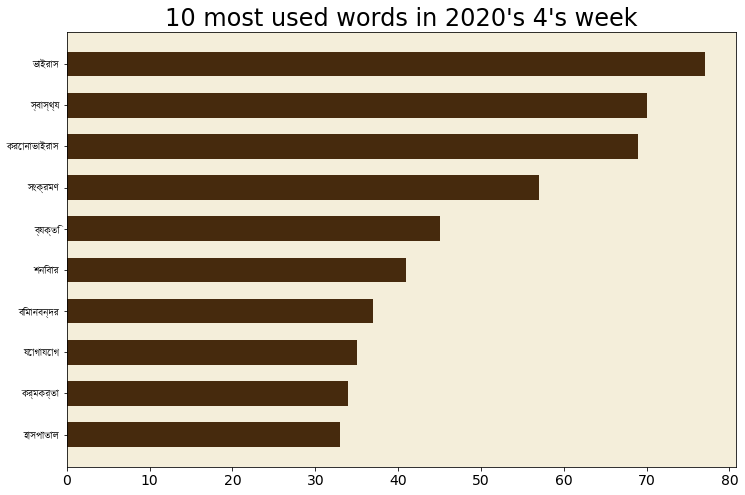

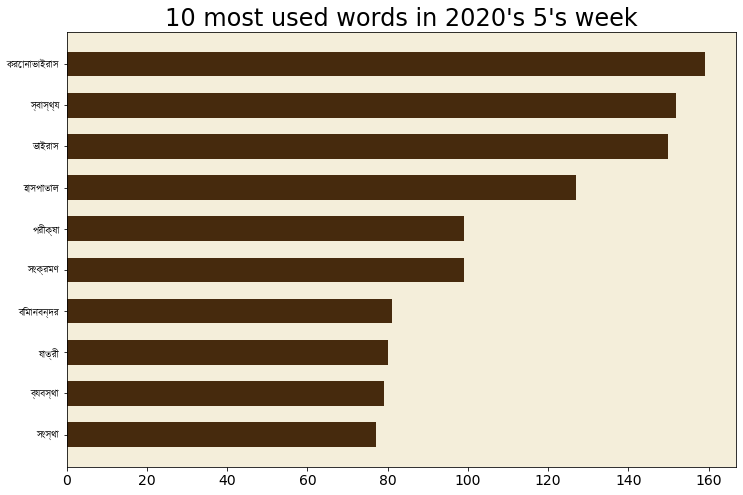

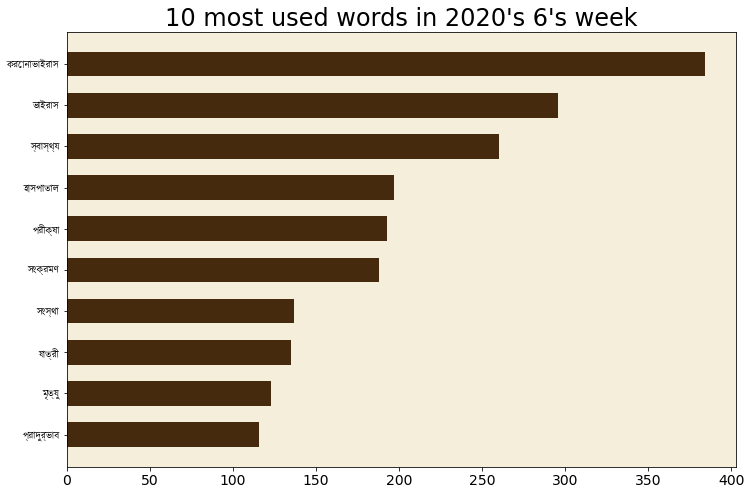

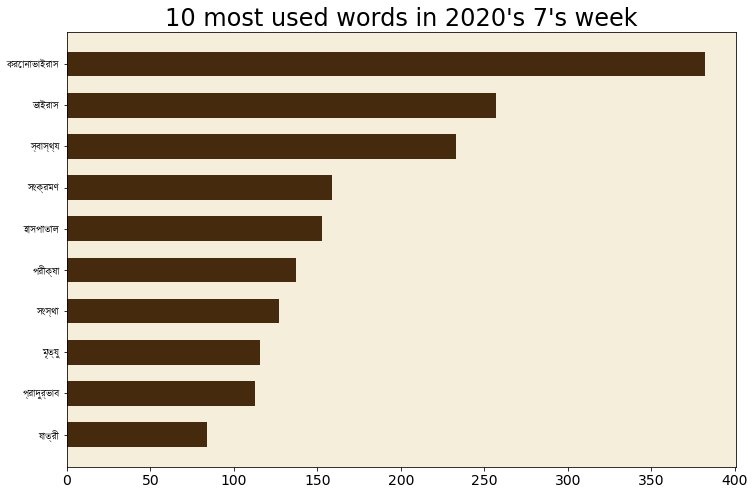

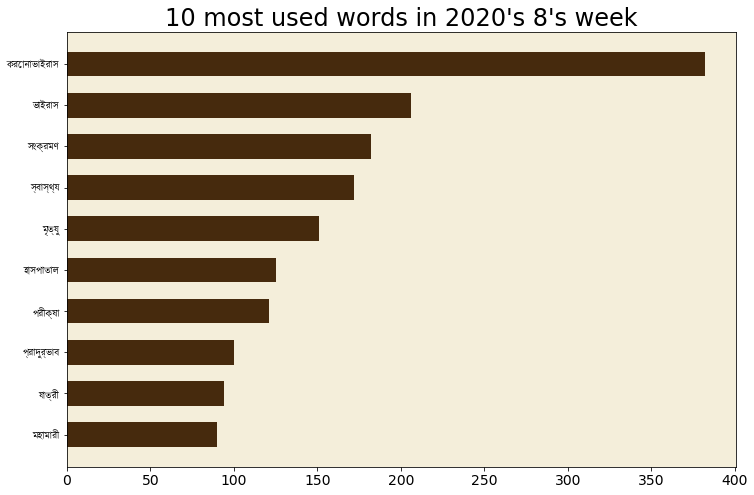

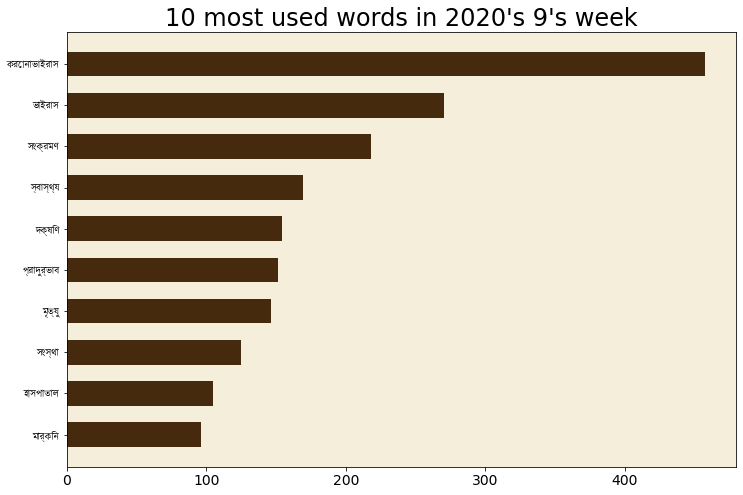

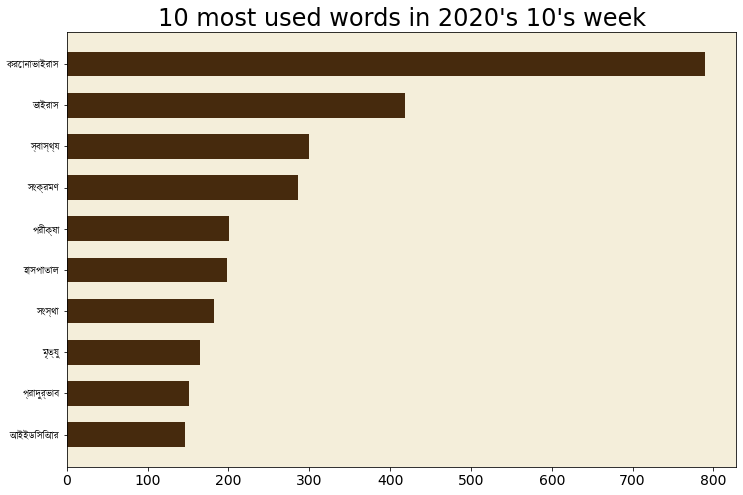

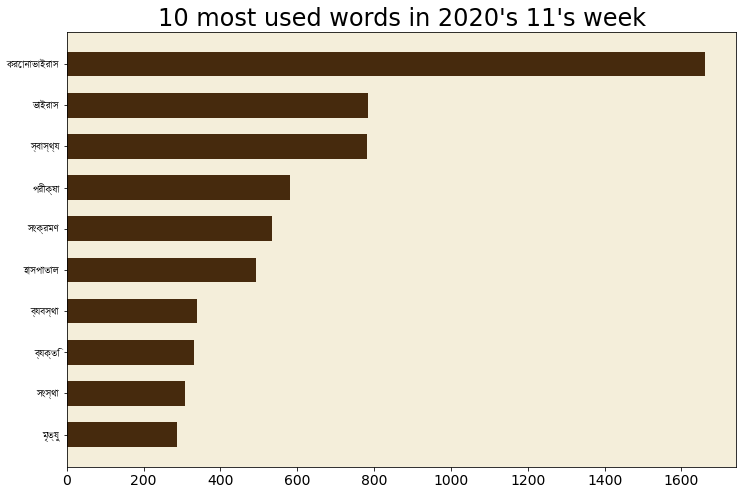

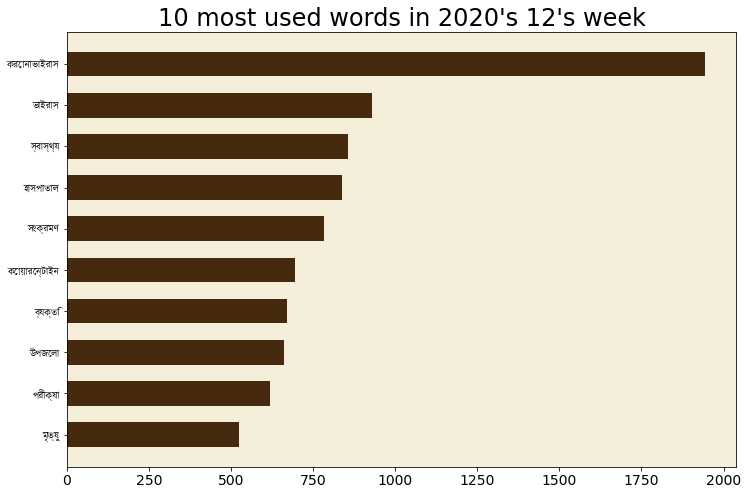

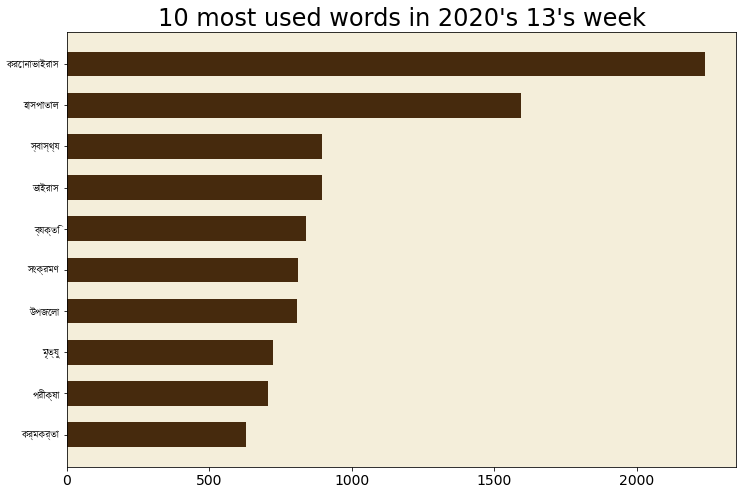

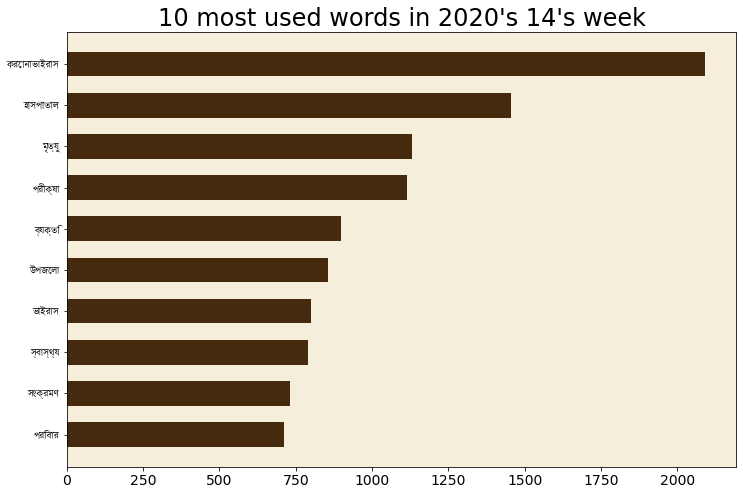

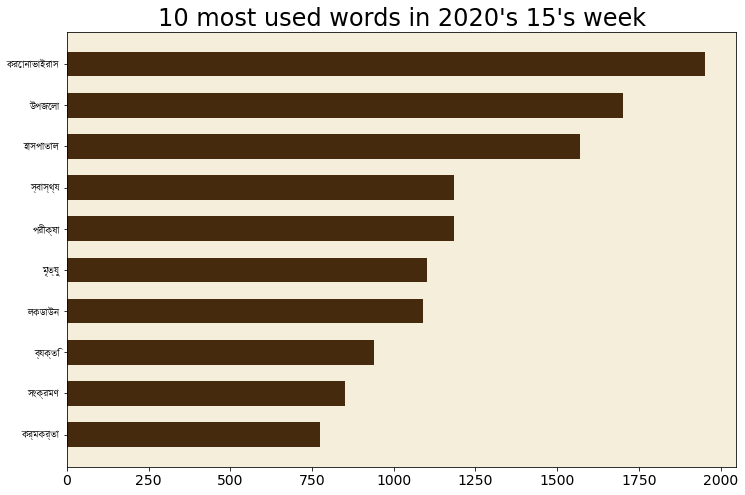

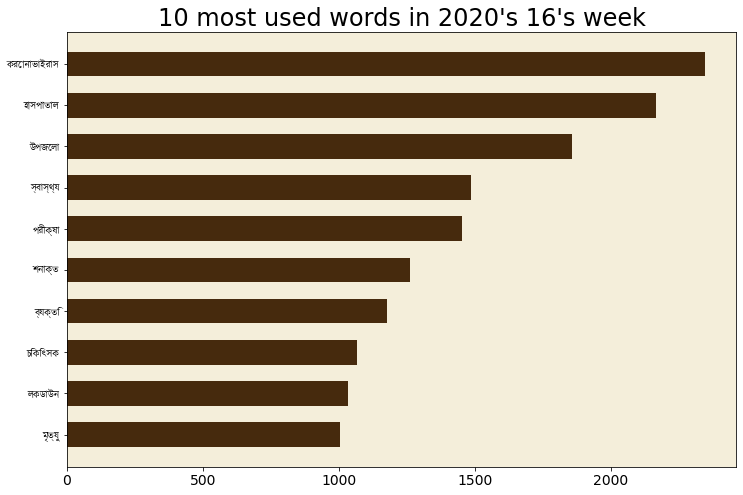

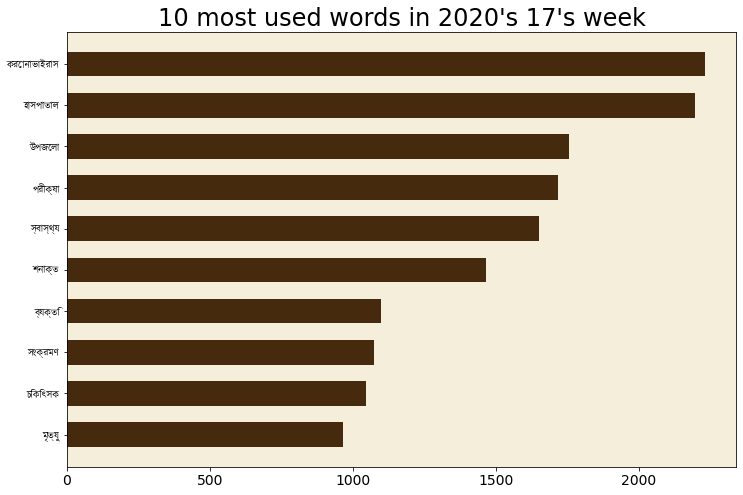

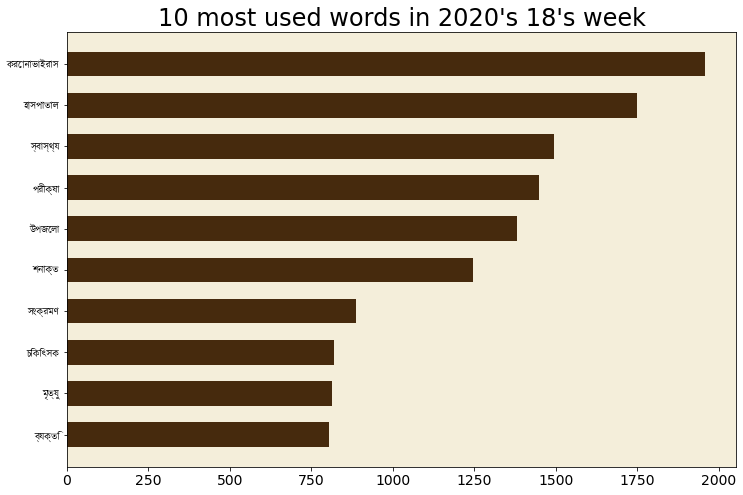

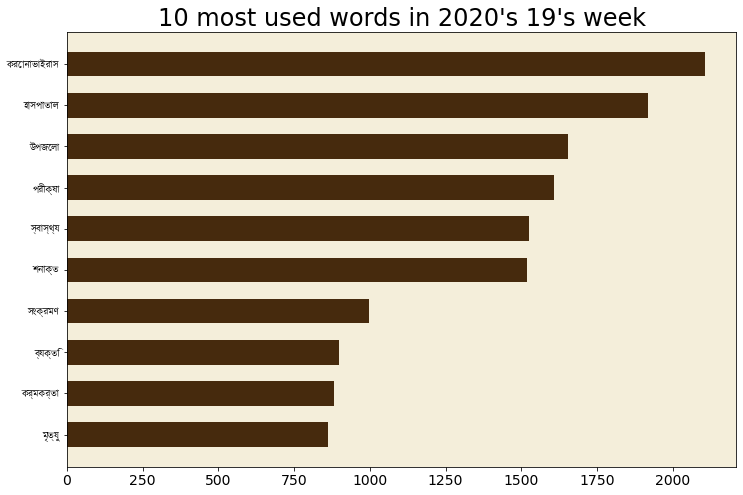

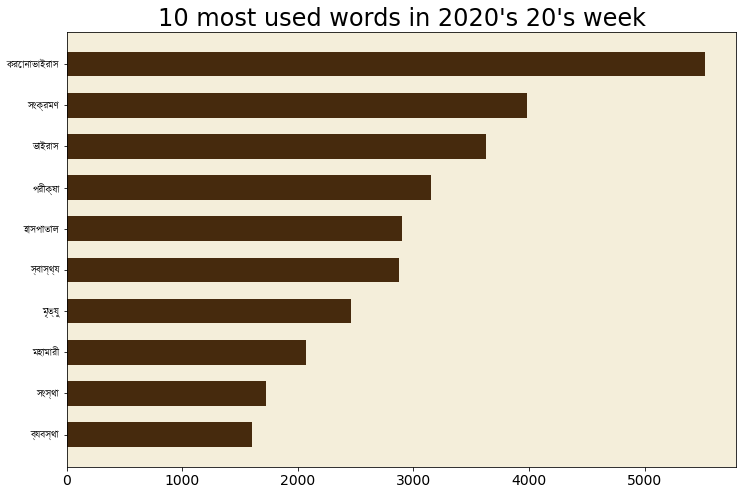

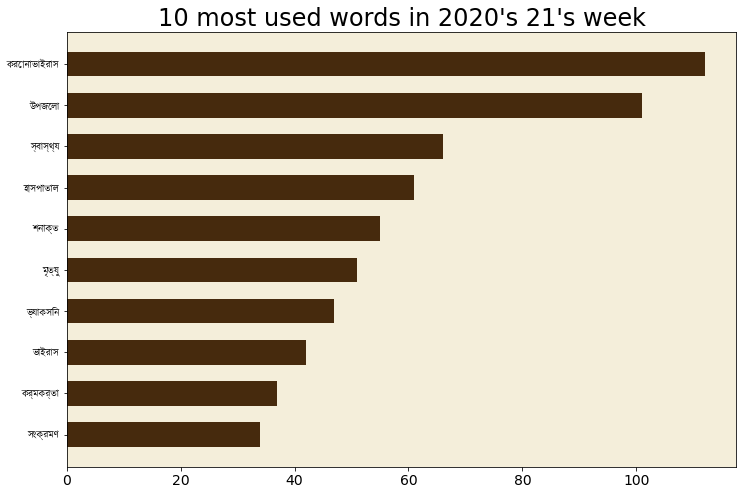

In [18]:
rcParams['figure.figsize'] = 12, 8 # I like bigger plots


for i, row in all_per_year.iterrows():
    sess = dict(nltk.FreqDist(row['text_en_clean_4']))
    sort_sess = sorted(sess.items(), key=lambda x: x[1], reverse=True)[0:10] # top how many? 
    plt.barh(range(len(sort_sess)), [val[1] for val in sort_sess], align='center', height=0.6, color='#462a0d')
    plt.yticks(range(len(sort_sess)), [val[0] for val in sort_sess],fontproperties=prop)
    plt.yticks(rotation=0)
    plt.title("10 most used words in 2020's %d's week" % row['Week Number'],fontsize=24)
    ax = plt.gca()
    ax.set_facecolor('#F4EEDA')
    ax.invert_yaxis() # makes sure it is ordered from most to least
    cnt = i
    renamee = 'Dtm' + str(i-3) + '.png'
    plt.savefig(renamee,dpi = 300)
    plt.show()

In [19]:
# get frequencies by year

freqs = {}
for i, speech in data_clean.iterrows():
    Week_Number = speech['Week Number']
    for token in speech['text_en_clean_4']:
        if token not in freqs:
            freqs[token] = {"total_freq":1, Week_Number:1}
        else:
            freqs[token]["total_freq"] += 1
            if not freqs[token].get(Week_Number):
                freqs[token][Week_Number] = 1
            else:
                freqs[token][Week_Number] += 1

In [20]:
freqs_df = pd.DataFrame.from_dict(freqs, orient='index')
freqs_df['word'] = freqs_df.index

In [21]:
# Example of data for the "clean" of the word "refuge"
freqs_df[freqs_df.index == "করোনাভাইরাস"]

,total_freq,20,12,13,14,16,17,18,19,6,15,11,4,9,10,5,7,8,21,48,word
করোনাভাইরাস,26782,5519.0,1942.0,2238.0,2089.0,2344.0,2229.0,1957.0,2105.0,384.0,1951.0,1660.0,69.0,457.0,789.0,159.0,382.0,382.0,112.0,14.0,করোনাভাইরাস


In [22]:
new_cols = ["total_freq", "word"] + sorted(freqs_df.columns.tolist()[1:-1])
freqs_df = freqs_df[new_cols]

freqs_df = freqs_df.sort_values('total_freq', ascending=False)

# freqs_df.to_csv('all_per_year_clean.csv', sep='|') #  in case you want to write this out as csv file

freqs_df.head()

,total_freq,word,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,48
করোনাভাইরাস,26782,করোনাভাইরাস,69.0,159.0,384.0,382.0,382.0,457.0,789.0,1660.0,1942.0,2238.0,2089.0,1951.0,2344.0,2229.0,1957.0,2105.0,5519.0,112.0,14.0
হাসপাতাল,17891,হাসপাতাল,33.0,127.0,197.0,153.0,125.0,105.0,198.0,493.0,839.0,1593.0,1456.0,1570.0,2165.0,2196.0,1749.0,1917.0,2903.0,61.0,11.0
স্বাস্থ্য,14965,স্বাস্থ্য,70.0,152.0,260.0,233.0,172.0,169.0,300.0,782.0,855.0,897.0,791.0,1186.0,1486.0,1650.0,1494.0,1527.0,2873.0,66.0,2.0
পরীক্ষা,14467,পরীক্ষা,17.0,99.0,193.0,137.0,121.0,89.0,201.0,581.0,618.0,705.0,1115.0,1184.0,1452.0,1716.0,1448.0,1609.0,3156.0,26.0,NaN
সংক্রমণ,12796,সংক্রমণ,57.0,99.0,188.0,159.0,182.0,218.0,286.0,534.0,783.0,812.0,731.0,851.0,921.0,1074.0,886.0,996.0,3980.0,34.0,5.0


In [23]:
freqs_df.drop(48, axis=1, inplace=True)

In [24]:
freqs_df.drop(21, axis=1, inplace=True)
freqs_df.drop(20, axis=1, inplace=True)

In [25]:
freqs_df

,total_freq,word,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
করোনাভাইরাস,26782,করোনাভাইরাস,69.0,159.0,384.0,382.0,382.0,457.0,789.0,1660.0,1942.0,2238.0,2089.0,1951.0,2344.0,2229.0,1957.0,2105.0
হাসপাতাল,17891,হাসপাতাল,33.0,127.0,197.0,153.0,125.0,105.0,198.0,493.0,839.0,1593.0,1456.0,1570.0,2165.0,2196.0,1749.0,1917.0
স্বাস্থ্য,14965,স্বাস্থ্য,70.0,152.0,260.0,233.0,172.0,169.0,300.0,782.0,855.0,897.0,791.0,1186.0,1486.0,1650.0,1494.0,1527.0
পরীক্ষা,14467,পরীক্ষা,17.0,99.0,193.0,137.0,121.0,89.0,201.0,581.0,618.0,705.0,1115.0,1184.0,1452.0,1716.0,1448.0,1609.0
সংক্রমণ,12796,সংক্রমণ,57.0,99.0,188.0,159.0,182.0,218.0,286.0,534.0,783.0,812.0,731.0,851.0,921.0,1074.0,886.0,996.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ওবেইদাত,1,ওবেইদাত,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
জয়ন্ত,1,জয়ন্ত,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
সুধীজনেরা,1,সুধীজনেরা,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
হাসিবা,1,হাসিবা,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
freqs_df.word.to_excel('All words.xlsx',index = False)

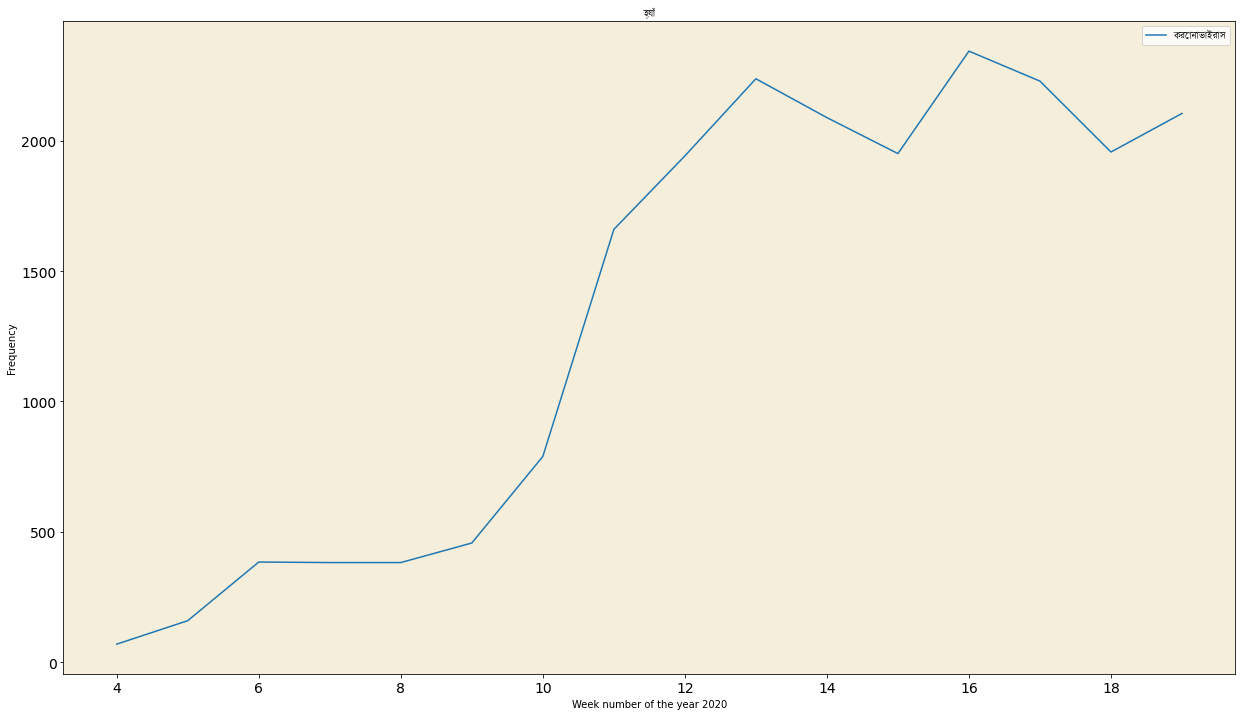

In [27]:
import matplotlib.font_manager as fm
prop = fm.FontProperties(fname='kalpurush.ttf')
pt = freqs_df[freqs_df['word'].isin(['করোনাভাইরাস'])].iloc[:, 1:47].transpose().iloc[1:]
fig, (ax1) = plt.subplots(1,1, figsize=(21,12))
pt.plot(ax = ax1)
ax1.set_title('হ্যাঁ', fontdict=dict(size=10),fontproperties=prop)
ax1.legend(['করোনাভাইরাস','স্বাস্থ্য'], prop = prop)
ax1.set_xlabel('Week number of the year 2020')
ax1.set_ylabel('Frequency')
ax1.set_facecolor('#F4EEDA')

In [28]:
# # plt.style.use(l[0])

# import matplotlib.font_manager as fm
# prop = fm.FontProperties(fname='kalpurush.ttf')
# pt = freqs_df[freqs_df['word'].isin(topic1)].iloc[:, 1:].transpose().iloc[1:]
# fig, (ax1) = plt.subplots(1,1, figsize=(10,7))
# pt.plot(ax = ax1)
# ax1.set_title('(a) Topic 1: Economic Crisis & Incentives', fontdict=dict(size=10),fontproperties=prop,fontsize = 20)
# ax1.legend(topic1, prop = prop)
# ax1.set_xlabel('Week number of the year 2020')
# ax1.set_ylabel('Frequency')
# ax1.set_facecolor('#F4EEDA')



NameError: ignored

# Topic Keywords from LDA Topic Model's keyword

In [29]:
topic1 = ['ব্যাংক','প্রভাব','অর্থনীতি','সরবরাহ','সংস্থা','অর্থনৈতিক','আর্থিক','সহায়তা','প্যাকেজ','প্রকল্প']
topic2 = ['ভাইরাস','করোনাভাইরাস','সংক্রমণ','মার্কিন','মহামারী','জানিয়েছেন','স্বাস্থ্য','সংস্থা','প্রাদুর্ভাব','ব্যবস্থা']
topic3 = ['ভাইরাস','করোনাভাইরাস','গবেষণা','ভ্যাকসিন','সংস্থা','সংক্রমণ','প্রতিরোধ','বিশেষজ্ঞ','বিজ্ঞানী','সমস্যা']
topic4 = ['শ্রমিক','কারখানা','বিক্রি','জরিমানা','অভিযোগ','কারাগার','দূরত্ব','ব্যবসায়ী','রাস্তা','বিক্ষোভ']
topic5 = ['হাসপাতাল','পরীক্ষা','চিকিৎসক','স্বাস্থ্য','চিকিৎসা','করোনাভাইরাস','মেডিকেল','আইইডিসিআর','পরিচালক','অধিদপ্তর']
topic6 = ['ফ্লাইট','যাত্রী','নাগরিক','বিমানবন্দর','আন্তর্জাতিক','প্রবাসী','কর্তৃপক্ষ','সিঙ্গাপুর','লকডাউন','প্রবেশ']
topic7 = ['মৃত্যু','করোনাভাইরাস','সংক্রমণ','শনাক্ত','স্বাস্থ্য','ভাইরাস','যুক্তরাষ্ট্র','বুলেটিন','প্রাণঘাতী','পরীক্ষা']
topic8 = ['উপজেলা','ব্যক্তি','স্বাস্থ্য','করোনাভাইরাস','শনাক্ত','কর্মকর্তা','পরিবার','হাসপাতাল','লকডাউন','সংগ্রহ']
topic9 = ['করোনাভাইরাস','পরিস্থিতি','ব্যবস্থা','প্রধানমন্ত্রী','সহায়তা','মন্ত্রণালয়','সিদ্ধান্ত','নির্দেশনা','সংক্রমণ','কার্যক্রম']

# Topic 1

In [30]:
l = plt.style.available
l

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [78]:
plt.style.use(l[6])

In [79]:
figsize = (25,15)

In [80]:
plt.rc('legend',fontsize=20)

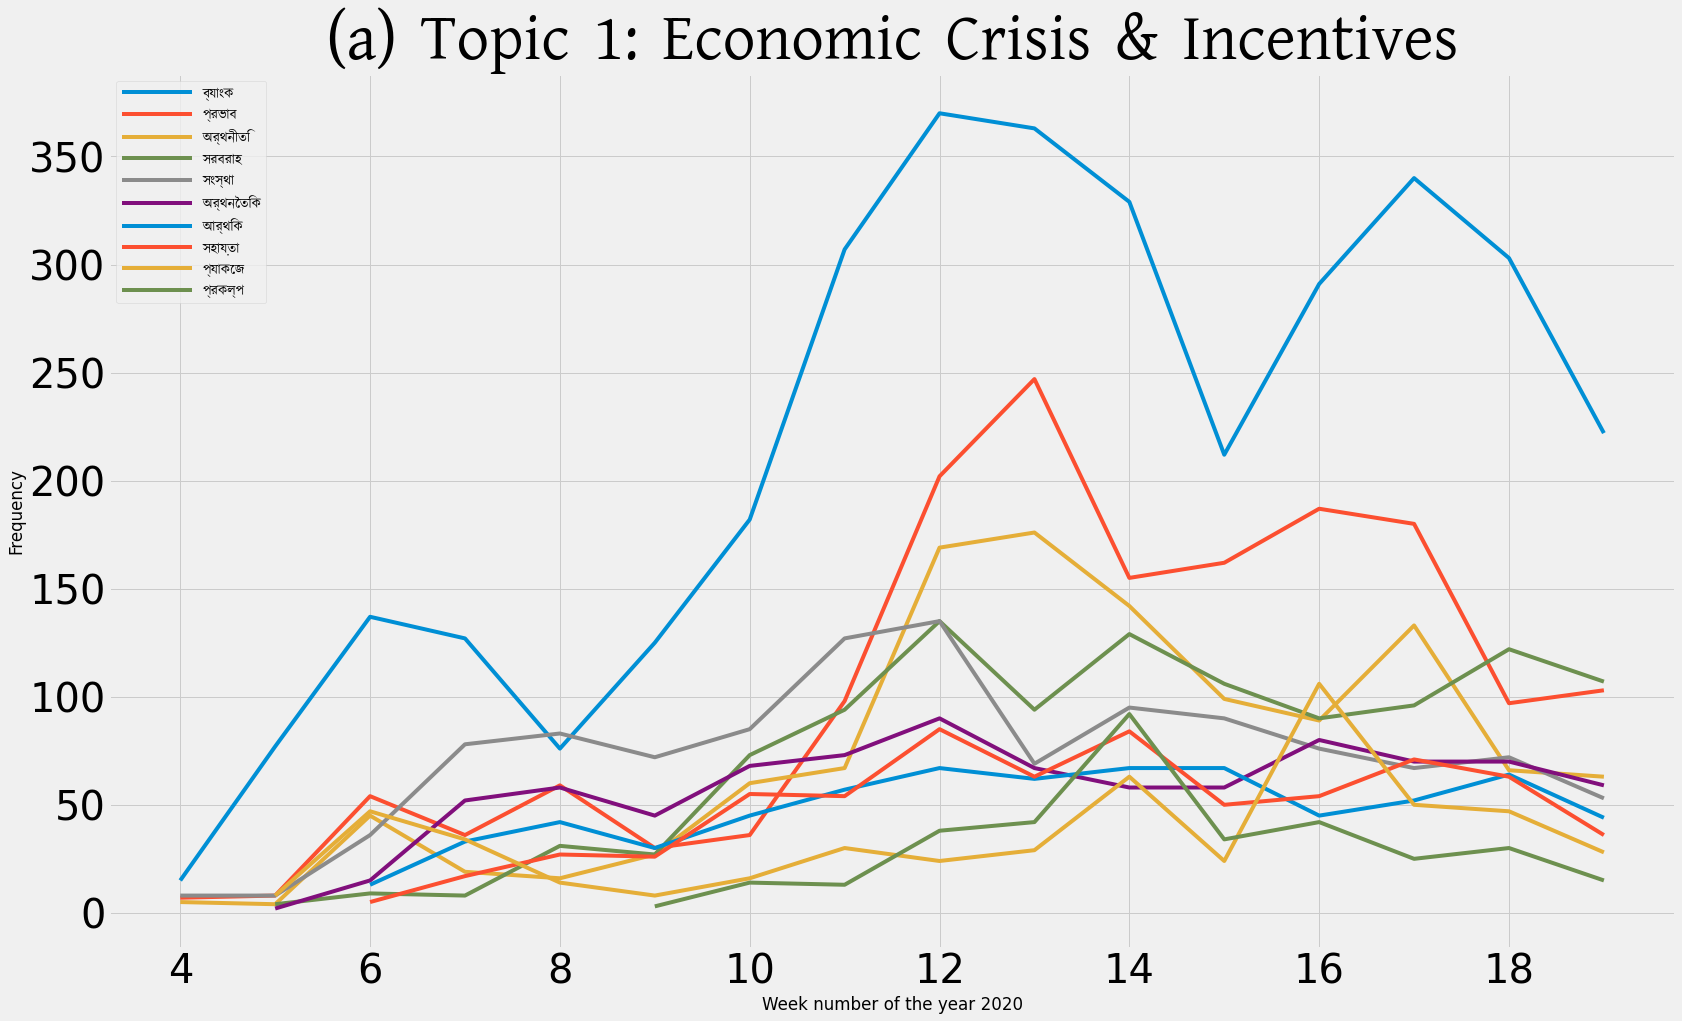

In [81]:
import matplotlib.font_manager as fm
prop = fm.FontProperties(fname='kalpurush.ttf')
pt = freqs_df[freqs_df['word'].isin(topic1)].iloc[:, 1:].transpose().iloc[1:]
fig, (ax1) = plt.subplots(1,1, figsize=figsize)
pt.plot(ax = ax1)
ax1.set_title('(a) Topic 1: Economic Crisis & Incentives', fontdict=dict(size=10),fontproperties=prop,fontsize = 65)
ax1.legend(topic1, prop = prop)
ax1.set_xlabel('Week number of the year 2020')
ax1.set_ylabel('Frequency')
ax1.tick_params(labelsize=40)
# ax1.set_facecolor('#F4EEDA')
plt.savefig('DTM_1_.pdf',format='pdf', dpi=2400,backend='pgf')

# Topic 2

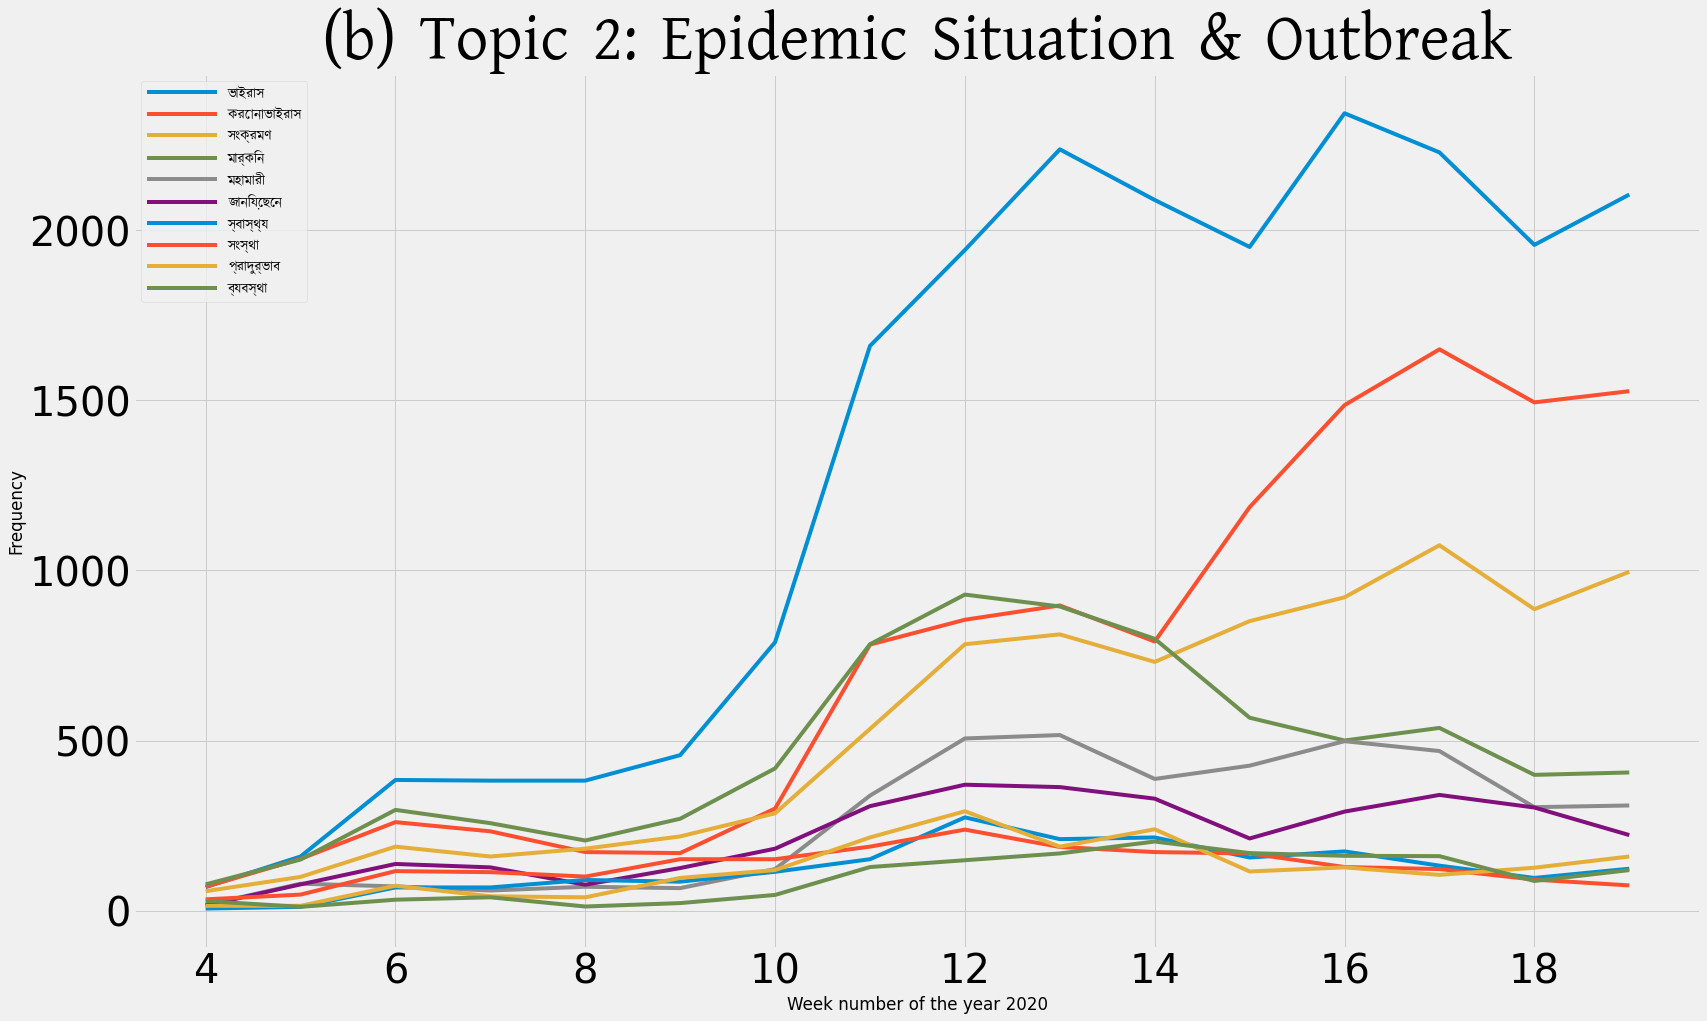

In [82]:
import matplotlib.font_manager as fm
prop = fm.FontProperties(fname='kalpurush.ttf')
pt = freqs_df[freqs_df['word'].isin(topic2)].iloc[:, 1:].transpose().iloc[1:]
fig, (ax1) = plt.subplots(1,1, figsize=figsize)
pt.plot(ax = ax1)
ax1.set_title('(b) Topic 2: Epidemic Situation & Outbreak', fontdict=dict(size=20),fontproperties=prop,fontsize = 65)
ax1.legend(topic2, prop = prop)
ax1.set_xlabel('Week number of the year 2020')
ax1.set_ylabel('Frequency')
# ax1.set_facecolor('#F4EEDA')
ax1.tick_params(labelsize=40)
plt.savefig('DTM_2_.pdf',format='pdf', dpi=2400,backend='pgf')

# Topic 3

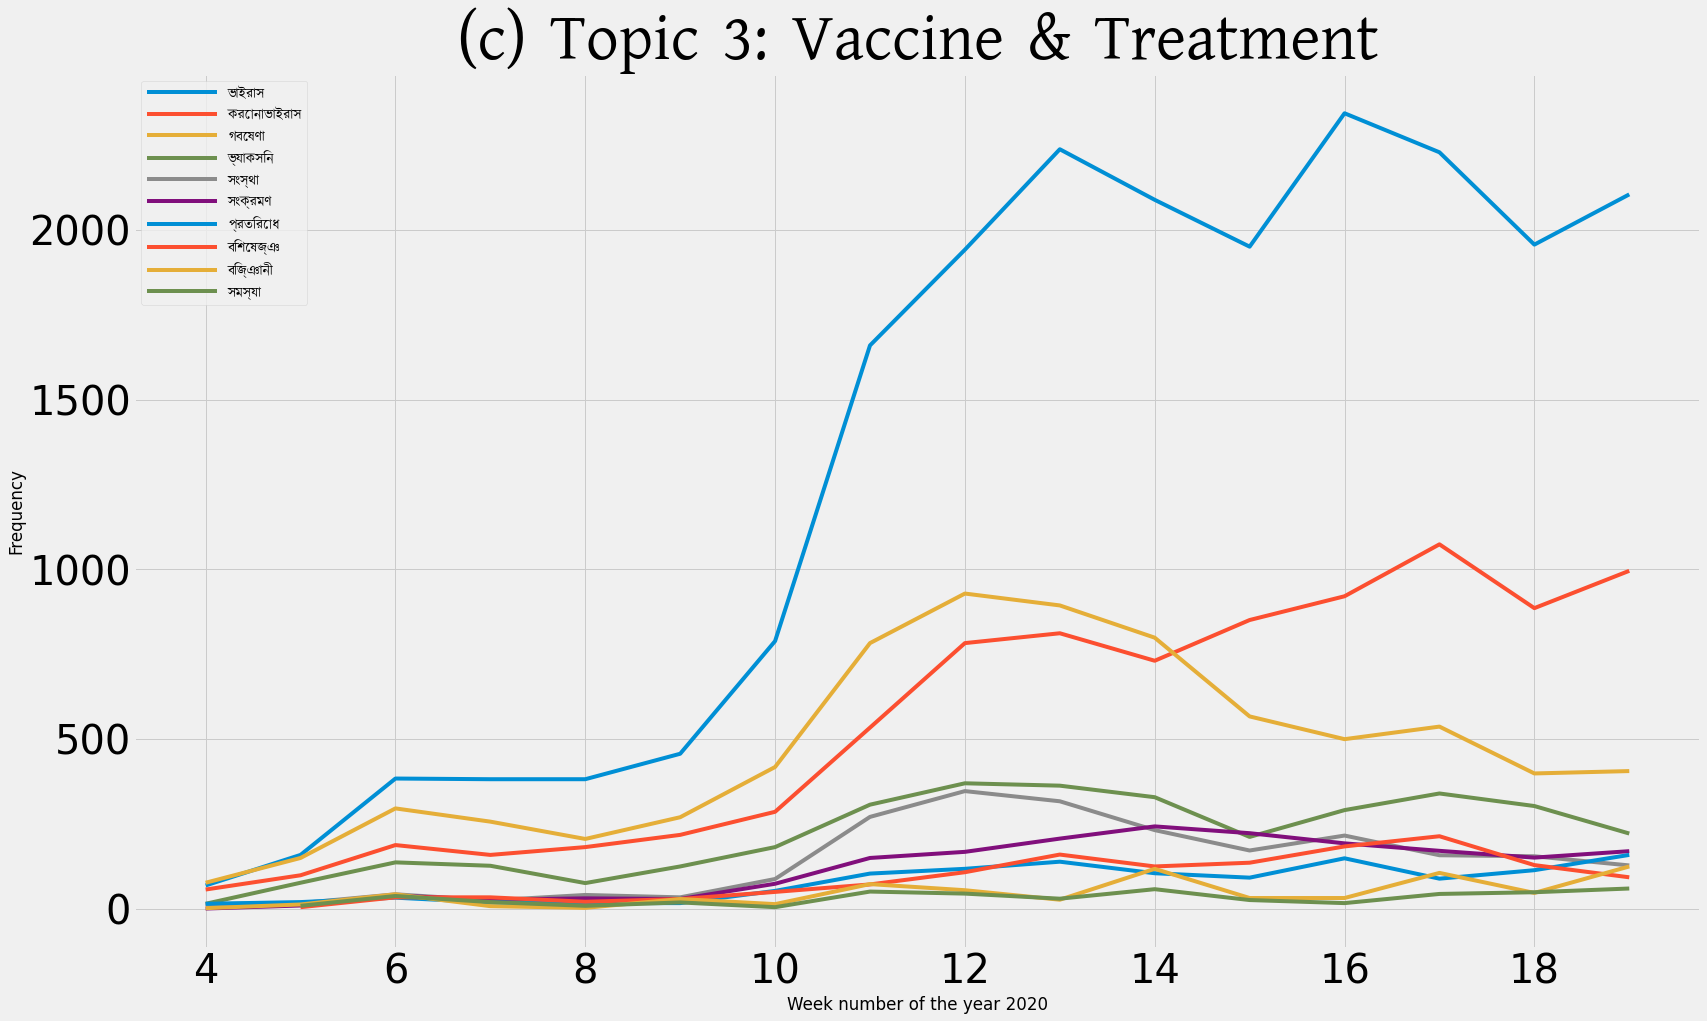

In [83]:
import matplotlib.font_manager as fm
prop = fm.FontProperties(fname='kalpurush.ttf')
pt = freqs_df[freqs_df['word'].isin(topic3)].iloc[:, 1:].transpose().iloc[1:]
fig, (ax1) = plt.subplots(1,1, figsize=figsize)
pt.plot(ax = ax1)
ax1.set_title('(c) Topic 3: Vaccine & Treatment', fontdict=dict(size=10),fontproperties=prop,fontsize = 65)
ax1.legend(topic3, prop = prop)
ax1.set_xlabel('Week number of the year 2020')
ax1.set_ylabel('Frequency')
# ax1.set_facecolor('#F4EEDA')
ax1.tick_params(labelsize=40)
plt.savefig('DTM_3_.pdf',format='pdf', dpi=2400,backend='pgf')

# Topic 4

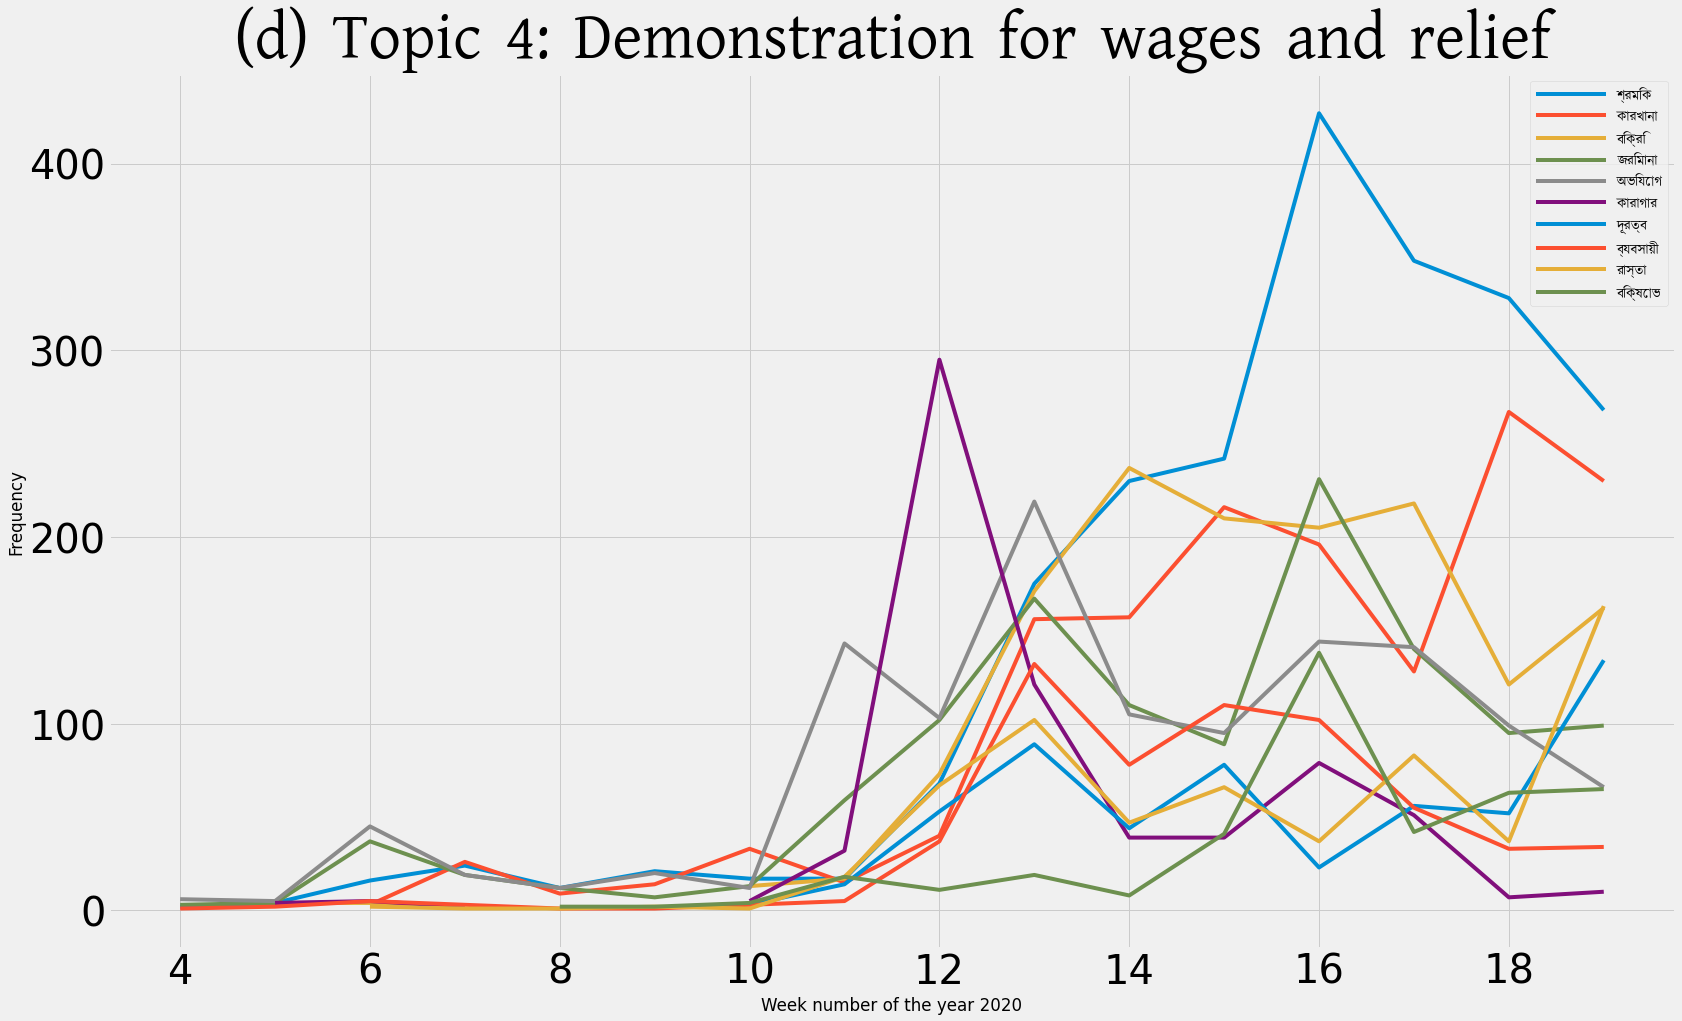

In [84]:
import matplotlib.font_manager as fm
prop = fm.FontProperties(fname='kalpurush.ttf')
pt = freqs_df[freqs_df['word'].isin(topic4)].iloc[:, 1:].transpose().iloc[1:]
fig, (ax1) = plt.subplots(1,1, figsize=figsize)
pt.plot(ax = ax1)
ax1.set_title('(d) Topic 4: Demonstration for wages and relief', fontdict=dict(size=10),fontproperties=prop,fontsize = 65)
ax1.legend(topic4, prop = prop)
ax1.set_xlabel('Week number of the year 2020')
ax1.set_ylabel('Frequency')
# ax1.set_facecolor('#F4EEDA')
ax1.tick_params(labelsize=40)
plt.savefig('DTM_4_.pdf',format='pdf', dpi=2400,backend='pgf')

# Topic 5

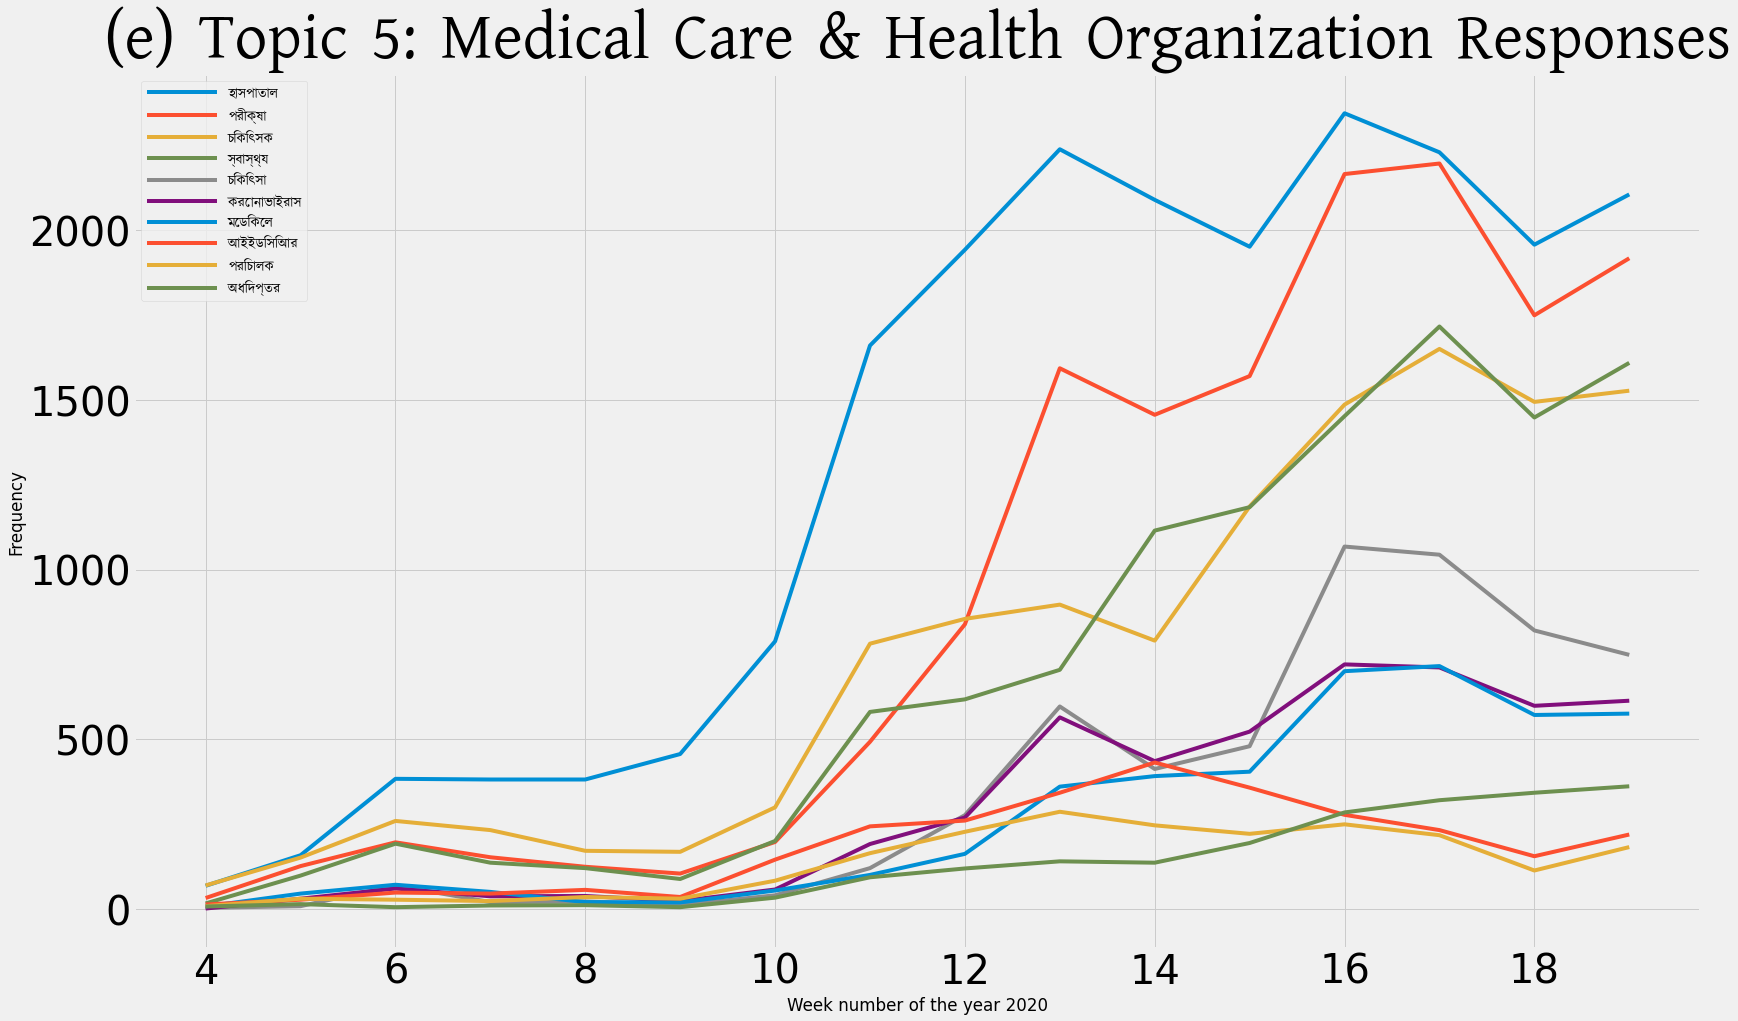

In [85]:
import matplotlib.font_manager as fm
prop = fm.FontProperties(fname='kalpurush.ttf')
pt = freqs_df[freqs_df['word'].isin(topic5)].iloc[:, 1:].transpose().iloc[1:]
fig, (ax1) = plt.subplots(1,1, figsize=figsize)
pt.plot(ax = ax1)
ax1.set_title('(e) Topic 5: Medical Care & Health Organization Responses', fontdict=dict(size=10),fontproperties=prop,fontsize = 65)
ax1.legend(topic5, prop = prop)
ax1.set_xlabel('Week number of the year 2020')
ax1.set_ylabel('Frequency')
# ax1.set_facecolor('#F4EEDA')
ax1.tick_params(labelsize=40)
plt.savefig('DTM_5_.pdf',format='pdf', dpi=2400,backend='pgf')

# Topic 6

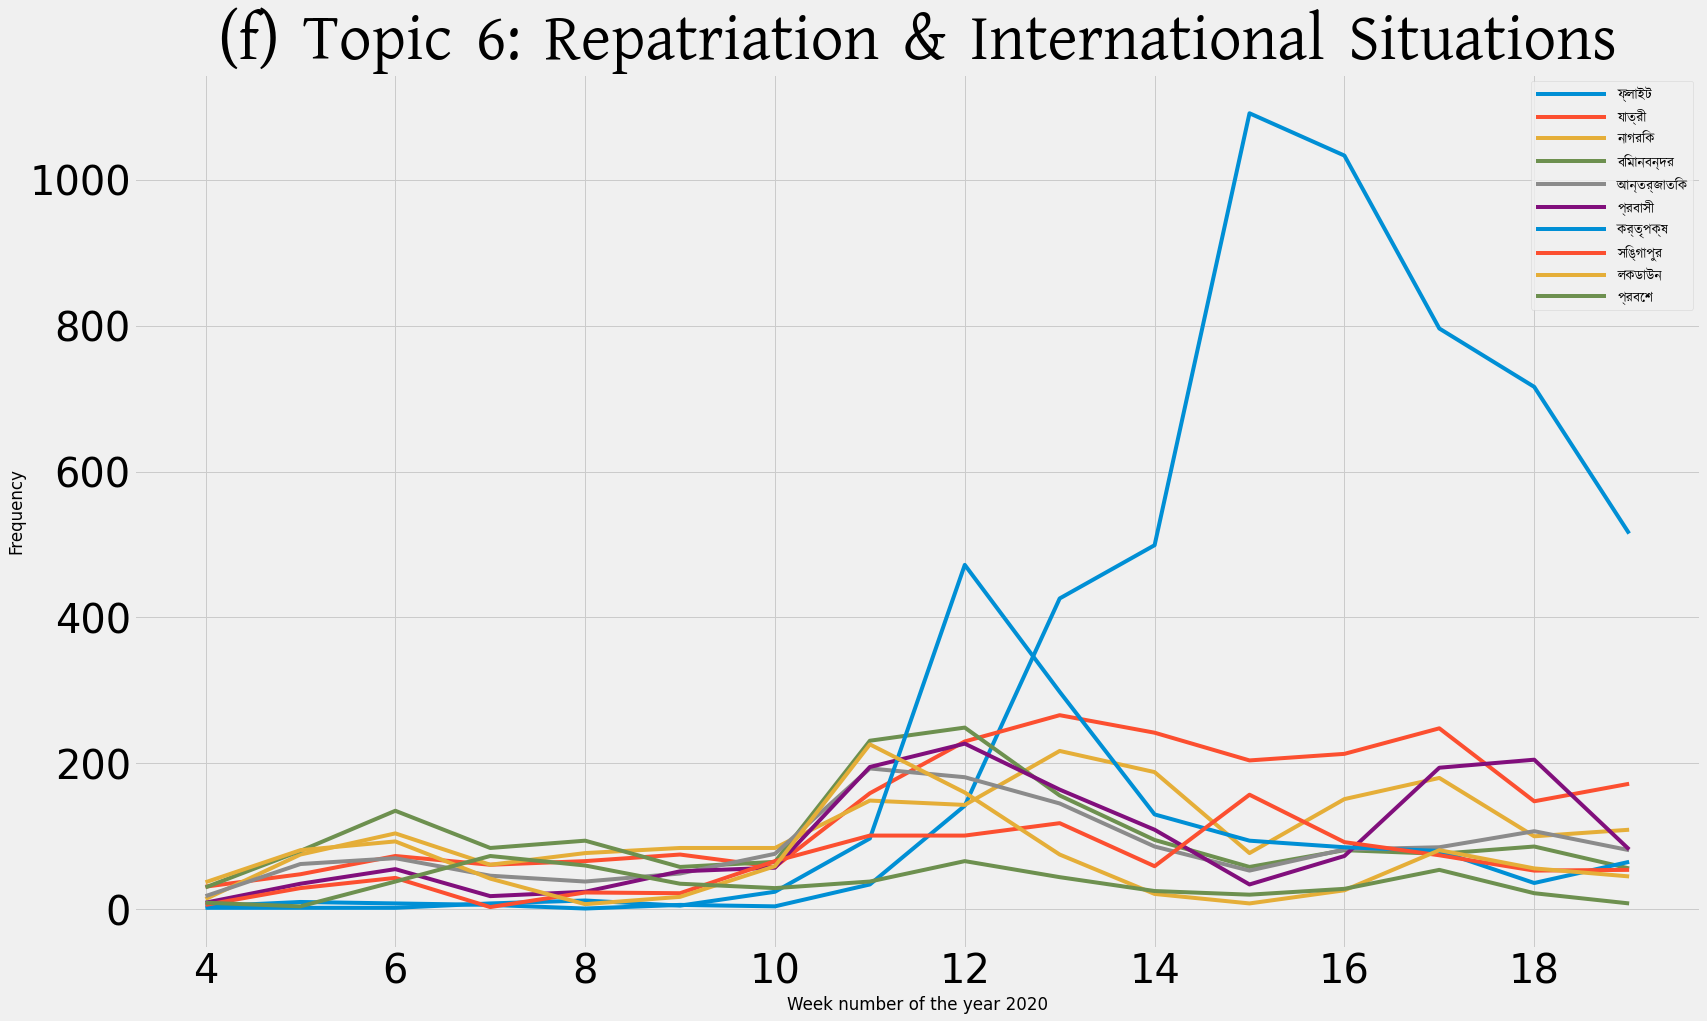

In [86]:
import matplotlib.font_manager as fm
prop = fm.FontProperties(fname='kalpurush.ttf')
pt = freqs_df[freqs_df['word'].isin(topic6)].iloc[:, 1:].transpose().iloc[1:]
fig, (ax1) = plt.subplots(1,1, figsize=figsize)
pt.plot(ax = ax1)
ax1.set_title('(f) Topic 6: Repatriation & International Situations', fontdict=dict(size=10),fontproperties=prop,fontsize = 65)
ax1.legend(topic6, prop = prop)
ax1.set_xlabel('Week number of the year 2020')
ax1.set_ylabel('Frequency')
# ax1.set_facecolor('#F4EEDA')
ax1.tick_params(labelsize=40)
plt.savefig('DTM_6_.pdf',format='pdf', dpi=2400,backend='pgf')

# Topic 7

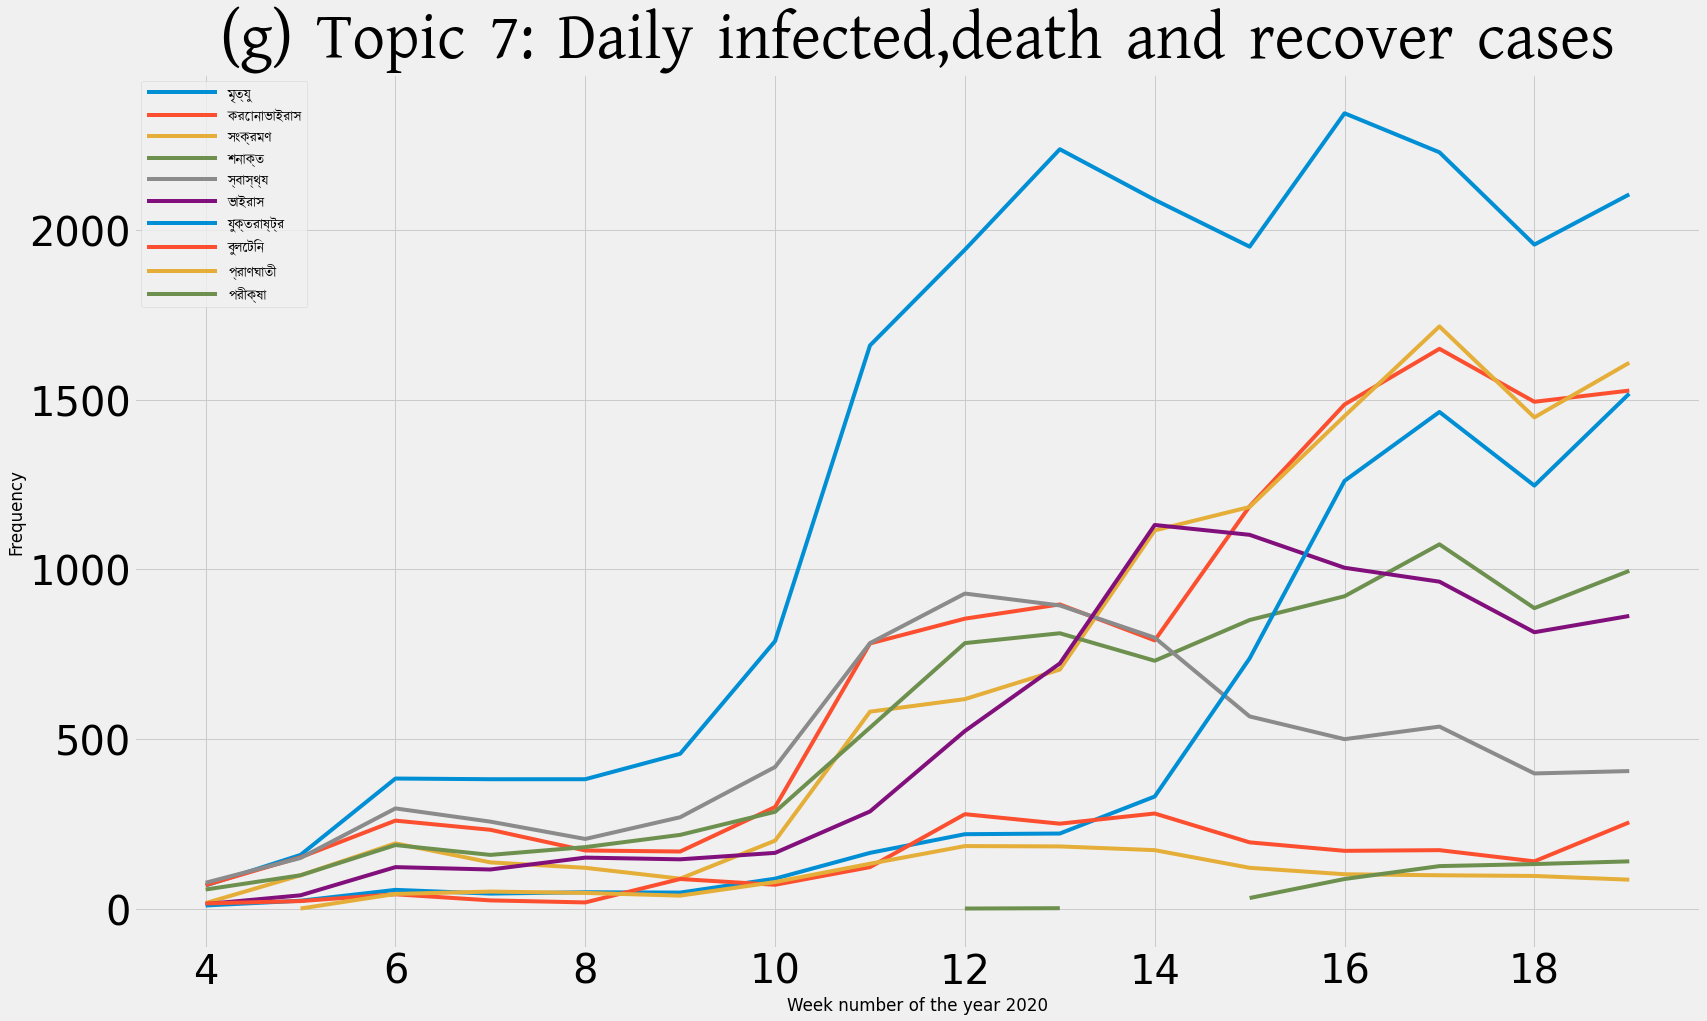

In [87]:
import matplotlib.font_manager as fm
prop = fm.FontProperties(fname='kalpurush.ttf')
pt = freqs_df[freqs_df['word'].isin(topic7)].iloc[:, 1:].transpose().iloc[1:]
fig, (ax1) = plt.subplots(1,1, figsize=figsize)
pt.plot(ax = ax1)
ax1.set_title('(g) Topic 7: Daily infected,death and recover cases', fontdict=dict(size=25),fontproperties=prop,fontsize = 65)
ax1.legend(topic7, prop = prop)
ax1.set_xlabel('Week number of the year 2020')
ax1.set_ylabel('Frequency')
# ax1.set_facecolor('#F4EEDA')
ax1.tick_params(labelsize=40)
plt.savefig('DTM_7_.pdf',format='pdf', dpi=2400,backend='pgf')

# Topic 8

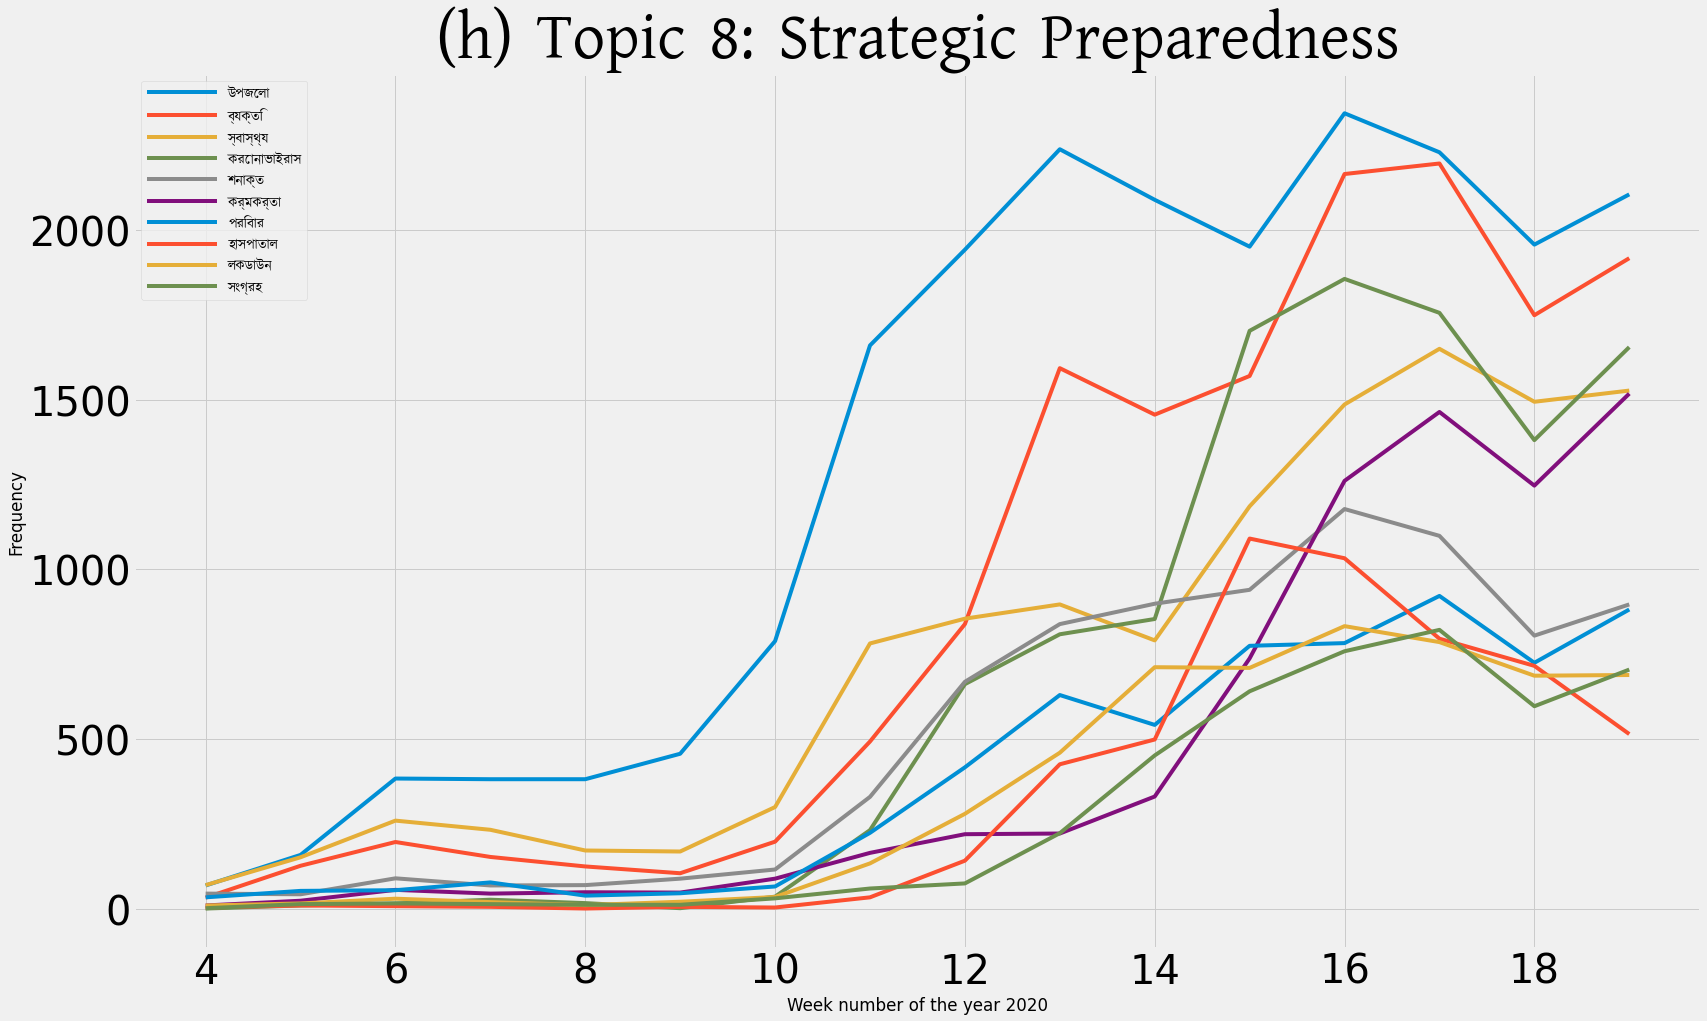

In [88]:
import matplotlib.font_manager as fm
prop = fm.FontProperties(fname='kalpurush.ttf')
pt = freqs_df[freqs_df['word'].isin(topic8)].iloc[:, 1:].transpose().iloc[1:]
fig, (ax1) = plt.subplots(1,1, figsize=figsize)
pt.plot(ax = ax1)
ax1.set_title('(h) Topic 8: Strategic Preparedness', fontdict=dict(size=25),fontproperties=prop,fontsize = 65)
ax1.legend(topic8, prop = prop)
ax1.set_xlabel('Week number of the year 2020')
ax1.set_ylabel('Frequency')
# ax1.set_facecolor('#F4EEDA')
ax1.tick_params(labelsize=40)
plt.savefig('DTM_8_.pdf',format='pdf', dpi=2400,backend='pgf')

# Topic 9

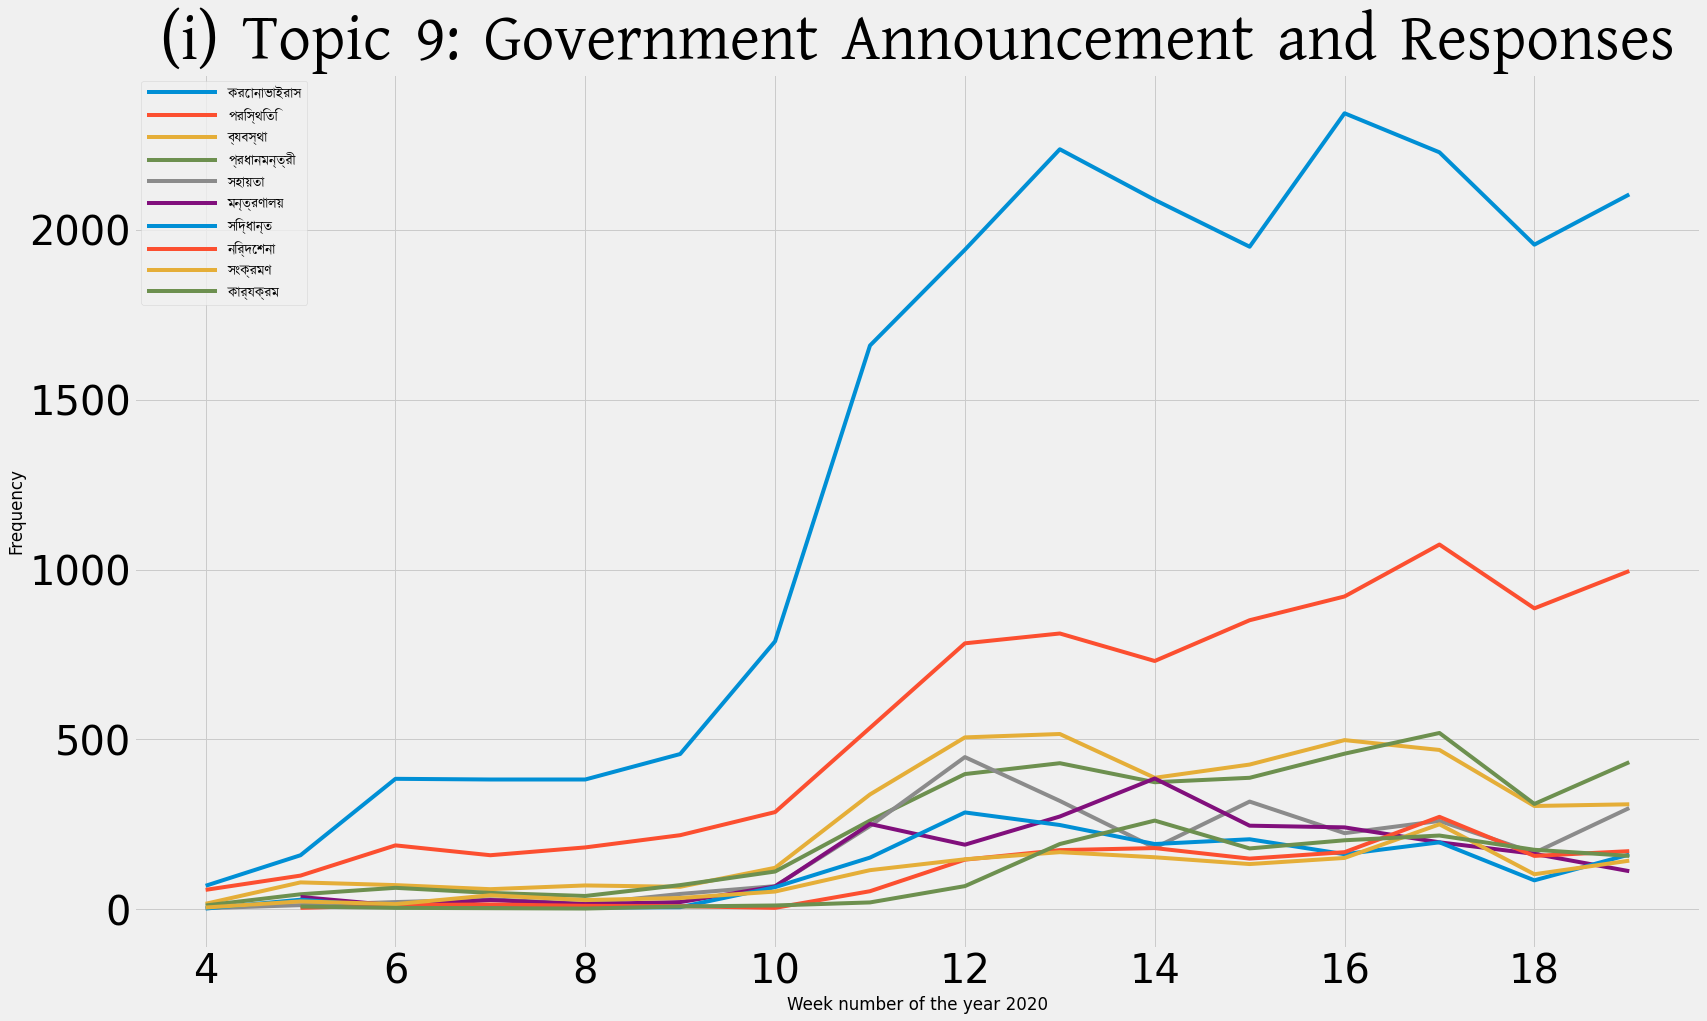

In [89]:
import matplotlib.font_manager as fm
prop = fm.FontProperties(fname='kalpurush.ttf')
pt = freqs_df[freqs_df['word'].isin(topic9)].iloc[:, 1:].transpose().iloc[1:]
fig, (ax1) = plt.subplots(1,1, figsize=figsize)
pt.plot(ax = ax1)
ax1.set_title('(i) Topic 9: Government Announcement and Responses', fontdict=dict(size=10),fontproperties=prop,fontsize = 65)
ax1.legend(topic9, prop = prop)
ax1.set_xlabel('Week number of the year 2020')
ax1.set_ylabel('Frequency')
# ax1.set_facecolor('#F4EEDA')
ax1.tick_params(labelsize=40)
plt.savefig('DTM_9_.pdf',format='pdf', dpi=2400,backend='pgf')